In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('diabetes_prediction_dataset.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [2]:
from sklearn.preprocessing import LabelEncoder
#Encoding
le = LabelEncoder()
df['gender_encoded'] = le.fit_transform(df["gender"])
df['smoking_encoded'] = le.fit_transform(df["smoking_history"])

training_points = df.drop(columns=['diabetes', 'gender', 'smoking_history'])

training_points.info()

training_labels = df['diabetes']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  100000 non-null  float64
 1   hypertension         100000 non-null  int64  
 2   heart_disease        100000 non-null  int64  
 3   bmi                  100000 non-null  float64
 4   HbA1c_level          100000 non-null  float64
 5   blood_glucose_level  100000 non-null  int64  
 6   gender_encoded       100000 non-null  int32  
 7   smoking_encoded      100000 non-null  int32  
dtypes: float64(3), int32(2), int64(3)
memory usage: 5.3 MB


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.3, 
	random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(70000, 8)
(70000,)
(30000, 8)
(30000,)


### Decision Tree

In [4]:
#Import Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Create a Gaussian Classifier
classifier = DecisionTreeClassifier(random_state=0)

#Train the model using the training sets
classifier.fit(X_train,y_train)

guesses = classifier.predict(X_test)

In [5]:
#Import scikit-learn metrics module for checking confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Confusion matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, guesses))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, guesses))

Confusion Matrix: 
 [[26568   841]
 [  630  1961]]
Accuracy: 0.9509666666666666


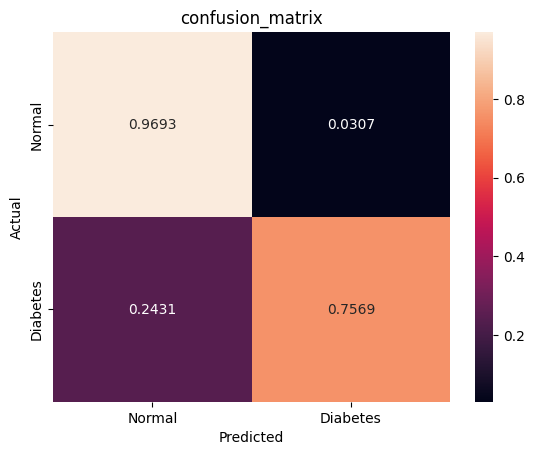

In [6]:
cm = confusion_matrix(y_test, guesses)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_normalized, annot=True, fmt=".4f", xticklabels=['Normal', 'Diabetes'], yticklabels=['Normal', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion_matrix')
plt.show()

### Ensemble Learning

In [7]:
#Import Random Forest
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
classifier = RandomForestClassifier(random_state=0, n_estimators=20)

#Train the model using the training sets y_pred=clf.predict(X_test)
classifier.fit(X_train,y_train)

guesses = classifier.predict(X_test)

In [8]:
# Confusion matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, guesses))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, guesses))

Confusion Matrix: 
 [[27293   116]
 [  781  1810]]
Accuracy: 0.9701


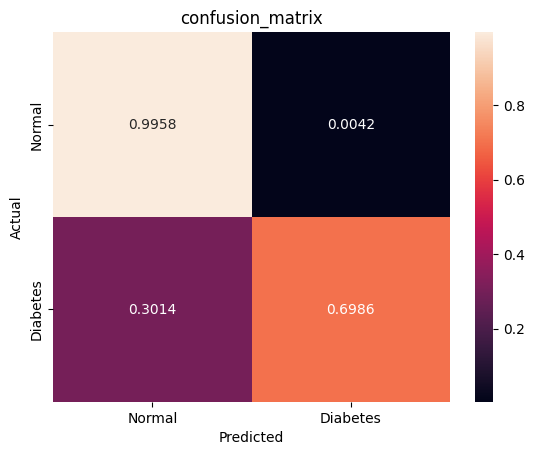

In [9]:
cm = confusion_matrix(y_test, guesses)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_normalized, annot=True, fmt=".4f", xticklabels=['Normal', 'Diabetes'], yticklabels=['Normal', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion_matrix')
plt.show()

### Adaboost

In [10]:
#Import Adaboost
from sklearn.ensemble import AdaBoostClassifier

#Create a Gaussian Classifier
classifier = AdaBoostClassifier(random_state=0, n_estimators=5)

#Train the model using the training sets y_pred=clf.predict(X_test)
classifier.fit(X_train,y_train)

guesses = classifier.predict(X_test)

In [11]:
# Confusion matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, guesses))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, guesses))

Confusion Matrix: 
 [[27409     0]
 [  819  1772]]
Accuracy: 0.9727


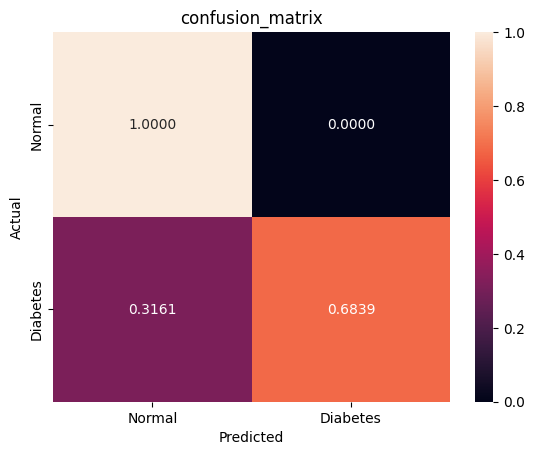

In [12]:
cm = confusion_matrix(y_test, guesses)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_normalized, annot=True, fmt=".4f", xticklabels=['Normal', 'Diabetes'], yticklabels=['Normal', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion_matrix')
plt.show()

### Stacking

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier

# Define base models
## base model에 adaboost 등 추가해보기
base_models = [
    ('svm', SVC(kernel = 'linear')),
    ('knn', KNeighborsClassifier(n_neighbors = 15))
]

# Create the stacking classifier with a logistic regression as the meta-model
classifier = StackingClassifier(estimators=base_models, final_estimator=DecisionTreeClassifier())

# Train the stacking classifier
classifier.fit(X_train, y_train)

guesses = classifier.predict(X_test)

In [15]:
# Confusion matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, guesses))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, guesses))

Confusion Matrix: 
 [[26633   776]
 [  867  1724]]
Accuracy: 0.9452333333333334


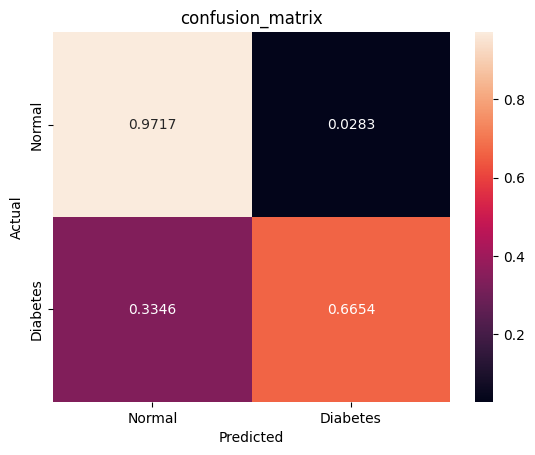

In [16]:
cm = confusion_matrix(y_test, guesses)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_normalized, annot=True, fmt=".4f", xticklabels=['Normal', 'Diabetes'], yticklabels=['Normal', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion_matrix')
plt.show()